In [1]:
#-*- coding: utf8

from sympy import Matrix as PrettyMatrix
from sympy import init_printing
init_printing()

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.sparse.csgraph as scigraph
import warnings

plt.ion()
warnings.filterwarnings('ignore')
init_printing()

In [2]:
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

# Lecture 06

Let's begin exploring the Adjacency matrix. To do so, we shall create a line graph with 4 nodes (same as slides). For a graph $G = \{\mathcal{V}, \mathcal{E}\}$, recall that the adjacency matrix is defined as $\mathbf{A}$ and it is of size $|\mathcal{V}| x |\mathcal{V}|$. 

$A_{ij} = 1$

when node $i$ is connected to node $j$.

In [3]:
n = 4

In [4]:
G = nx.Graph()
for i in range(n):
    G.add_node(i)
    if i > 0:
        G.add_edge(i-1, i)

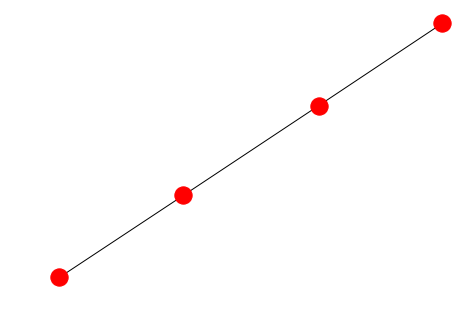

In [5]:
nx.draw_spring(G)

I have imported sympy's (symbolic computation package) Matrix as PrettyMatrix. This was done simply because it renders well on a notebook.

## Simple Adjacency Fun

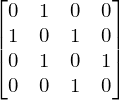

In [6]:
A = nx.adjacency_matrix(G).toarray() # toarray converts to numpy
PrettyMatrix(A)

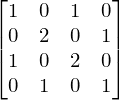

In [7]:
PrettyMatrix((A @ A))

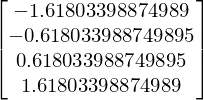

In [8]:
eigvals, eigvects = np.linalg.eigh(A)
PrettyMatrix(eigvals)

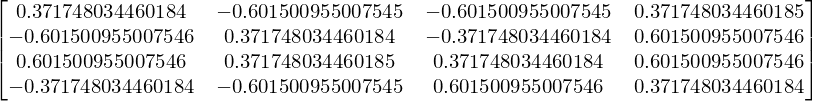

In [9]:
PrettyMatrix(eigvects)

## Laplacian Fun

Looking at the laplacian of the line graph, same as in slides.

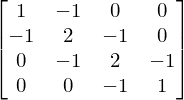

In [10]:
PrettyMatrix(scigraph.laplacian(A))

Now let's load a more interesting network from Game of Thrones. Interpretable, if you watch HBO or read books.

In [11]:
%%sh
head stormofswords.csv

Aemon,Grenn,5
Aemon,Samwell,31
Aerys,Jaime,18
Aerys,Robert,6
Aerys,Tyrion,5
Aerys,Tywin,8
Alliser,Mance,5
Amory,Oberyn,5
Arya,Anguy,11
Arya,Beric,23


In [12]:
G = nx.read_edgelist('stormofswords.csv', delimiter=',', data=False)

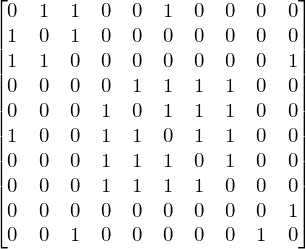

In [13]:
A = nx.adjacency_matrix(G).toarray()
PrettyMatrix(A)[:10, :10]

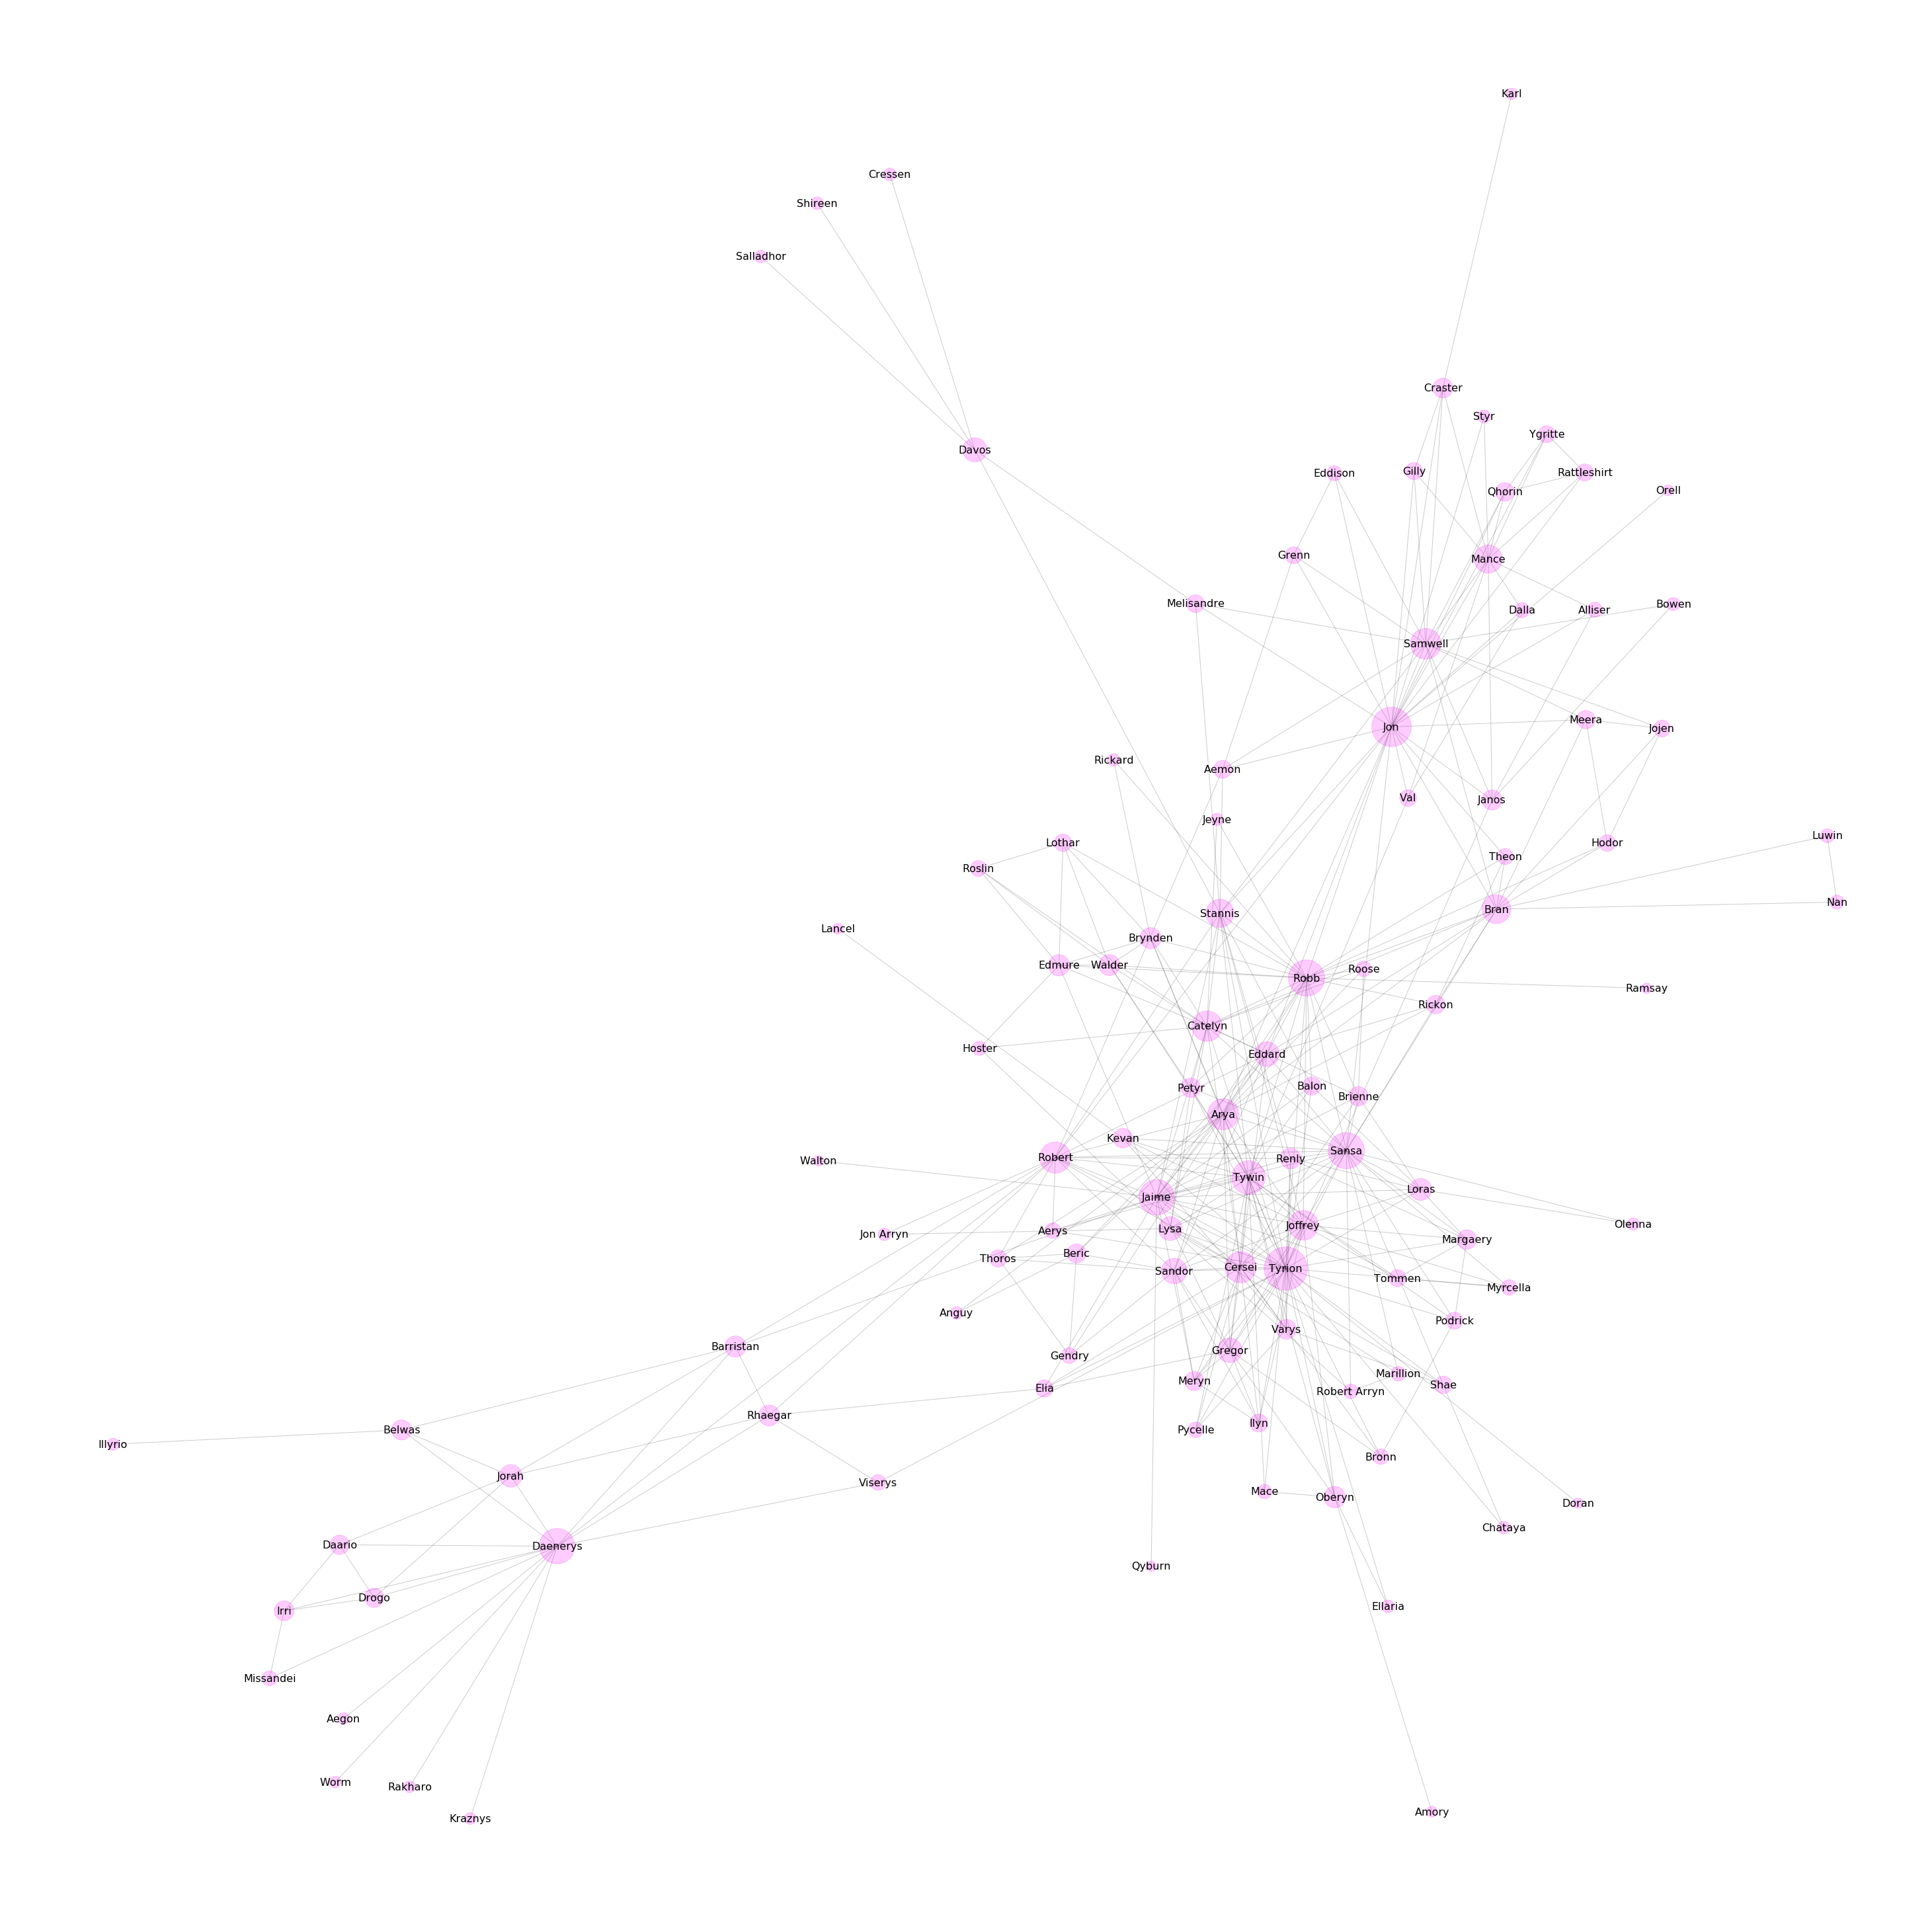

In [14]:
plt.figure(figsize=(40, 40),frameon=False)
pos = nx.spring_layout(G, iterations=100) 
size = nx.algorithms.pagerank(G)
nx.draw(G, pos, node_size=np.array(list(size.values())) * 100000,
        node_color='magenta', alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=16);

In [15]:
sum(nx.triangles(G).values()) # network x apparently counts for every node

In [16]:
A = nx.adjacency_matrix(G).toarray()
np.trace(A@A@A) / 6

In [17]:
sum(np.linalg.eigh(A@A@A)[0]) / 6

Just the first two eigenvalues approximates the # triangles

In [18]:
sum(np.linalg.eigh(A@A@A)[0][-2:]) / 6

Text(0, 0.5, 'Eigenvalue')

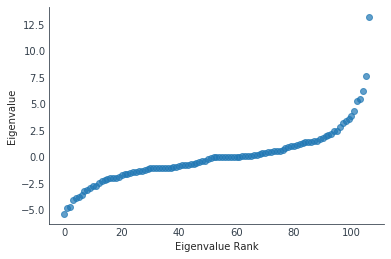

In [19]:
d, Q = np.linalg.eigh(A)
plt.scatter(np.arange(len(d)), d, alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xlabel('Eigenvalue Rank')
plt.ylabel('Eigenvalue')

Let's re-read the graph with weights

In [20]:
G = nx.read_weighted_edgelist('stormofswords.csv', delimiter=',')
A = nx.adjacency_matrix(G).toarray()

Text(0, 0.5, 'Eigenvalue')

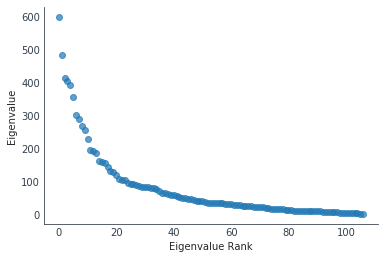

In [21]:
L = scigraph.laplacian(A)
d, Q = np.linalg.eigh(L)
plt.scatter(np.arange(len(d)), d[::-1], alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xlabel('Eigenvalue Rank')
plt.ylabel('Eigenvalue')

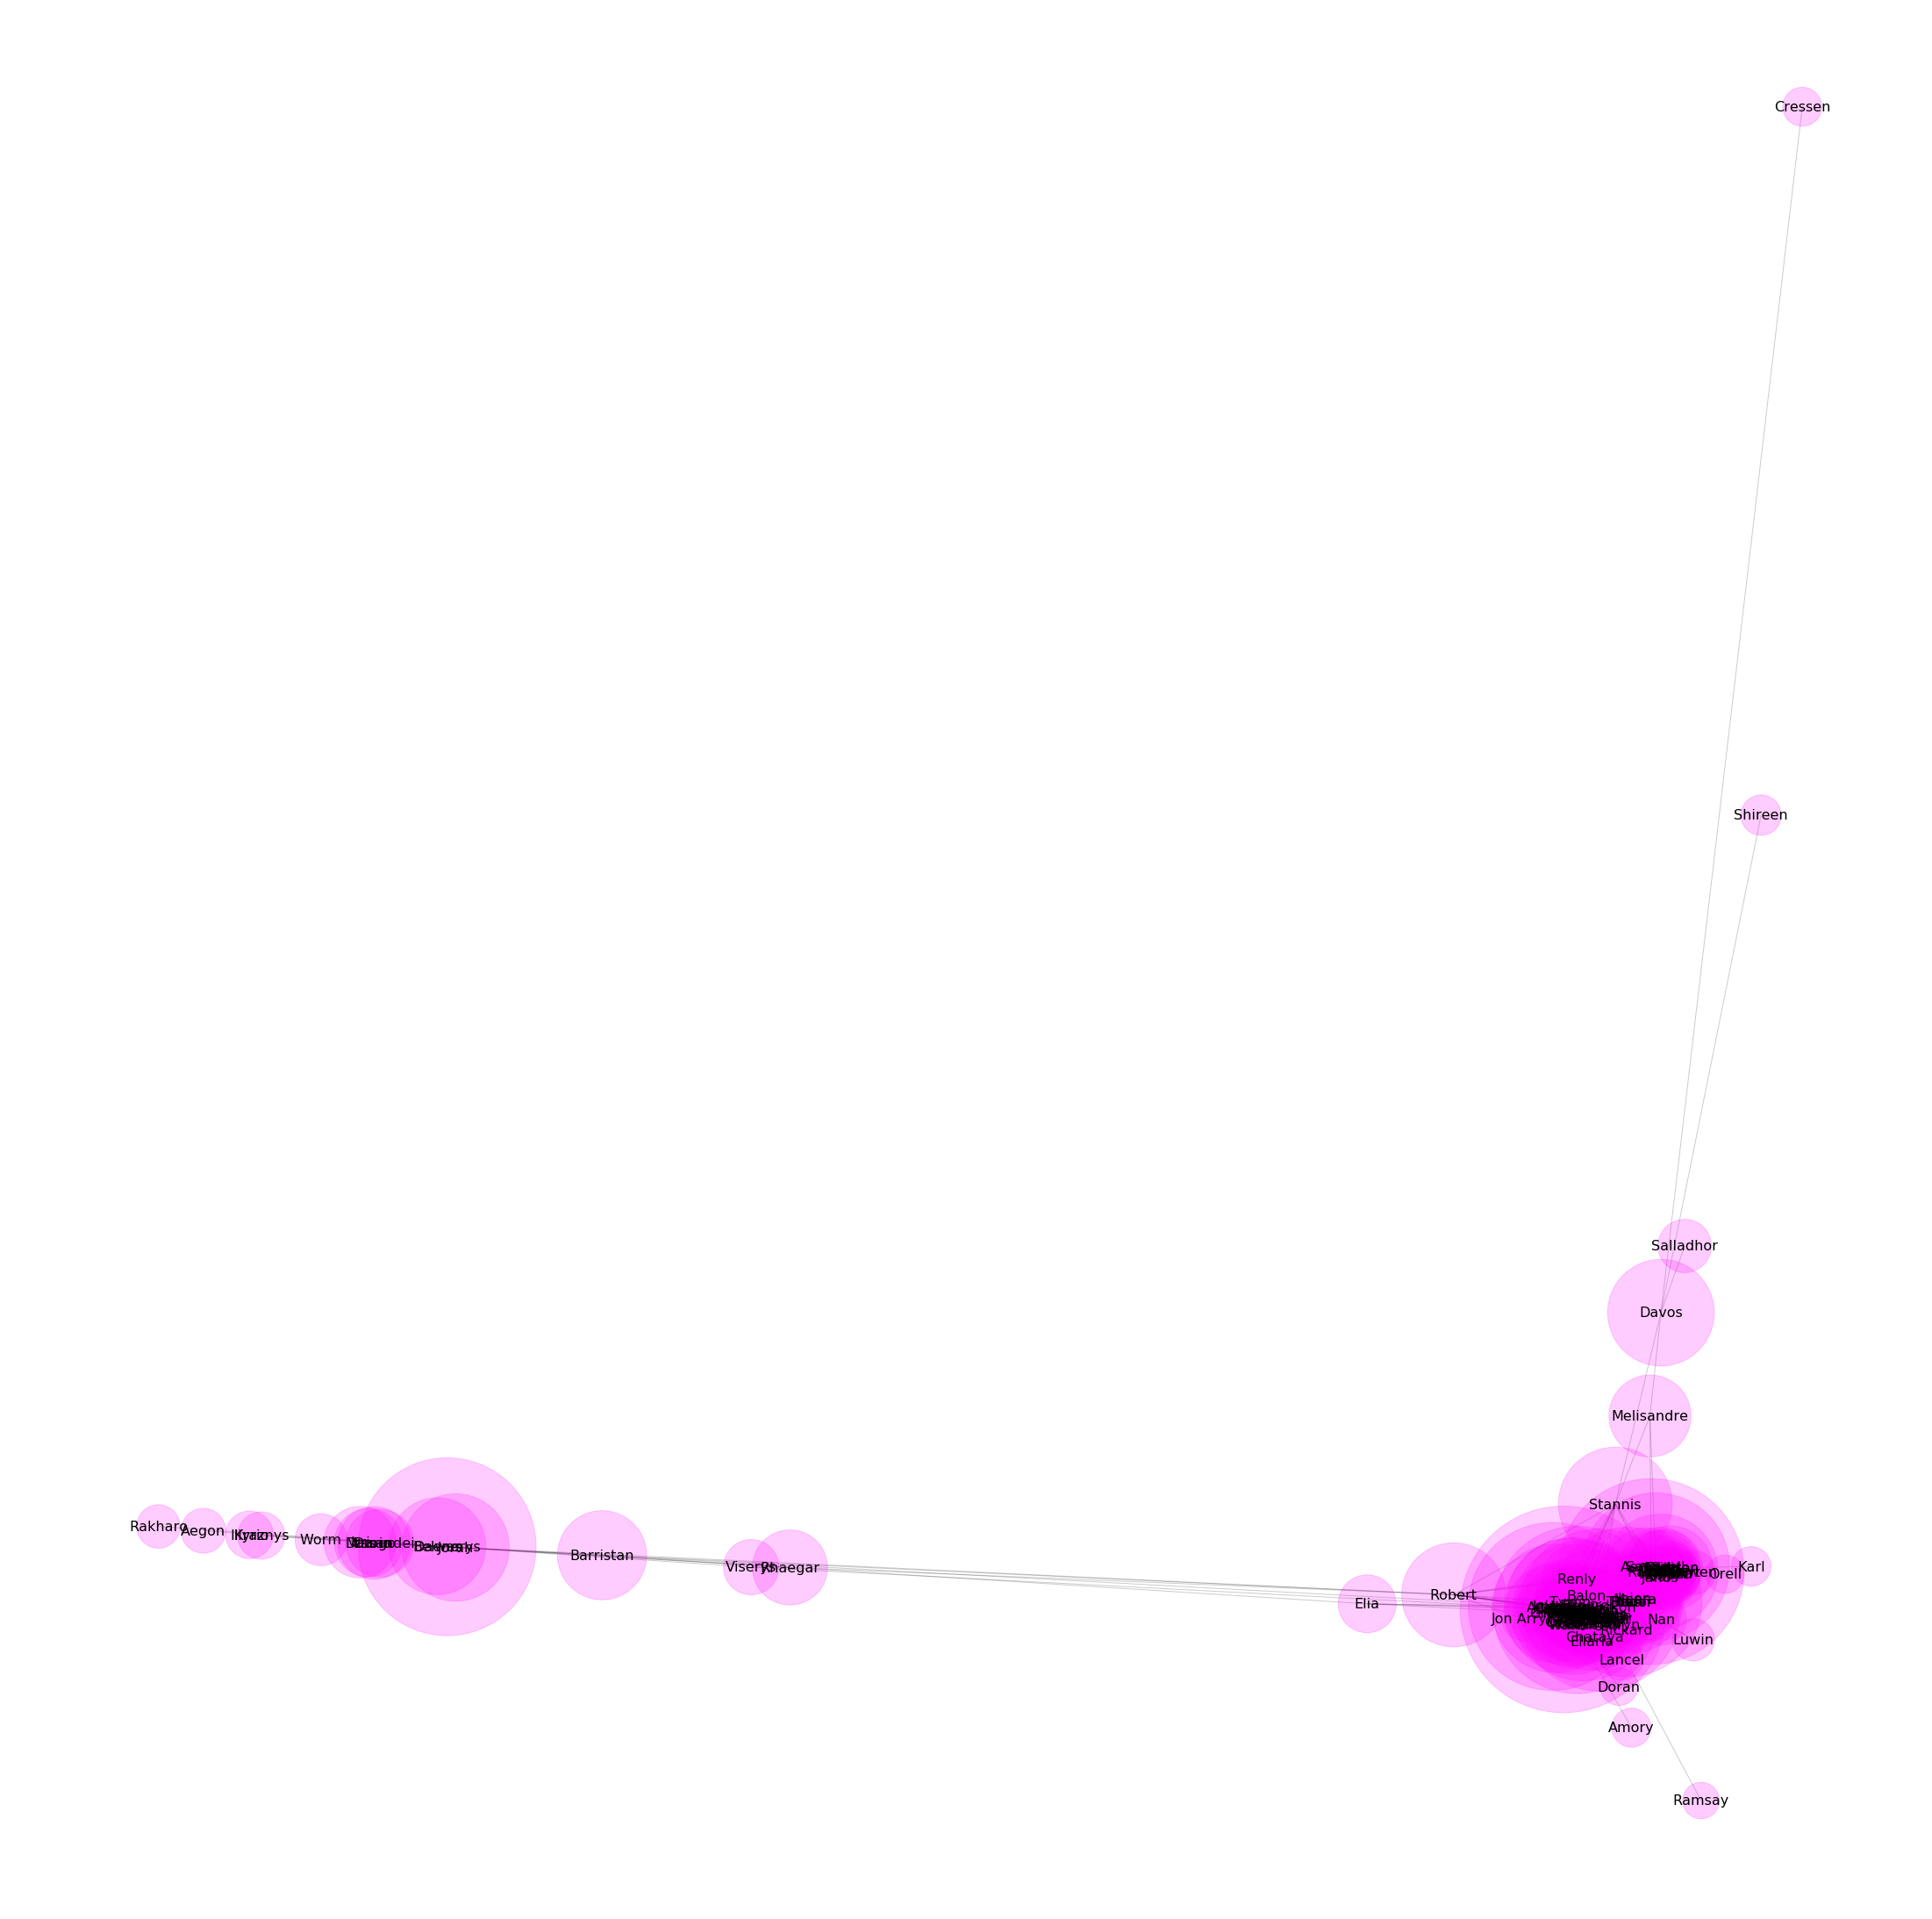

In [22]:
plt.figure(figsize=(30, 30),frameon=False)
pos = nx.spectral_layout(G) 
size = nx.algorithms.pagerank(G)
nx.draw(G, pos, node_size=np.array(list(size.values())) * 1000000,
        node_color='magenta', alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=16);

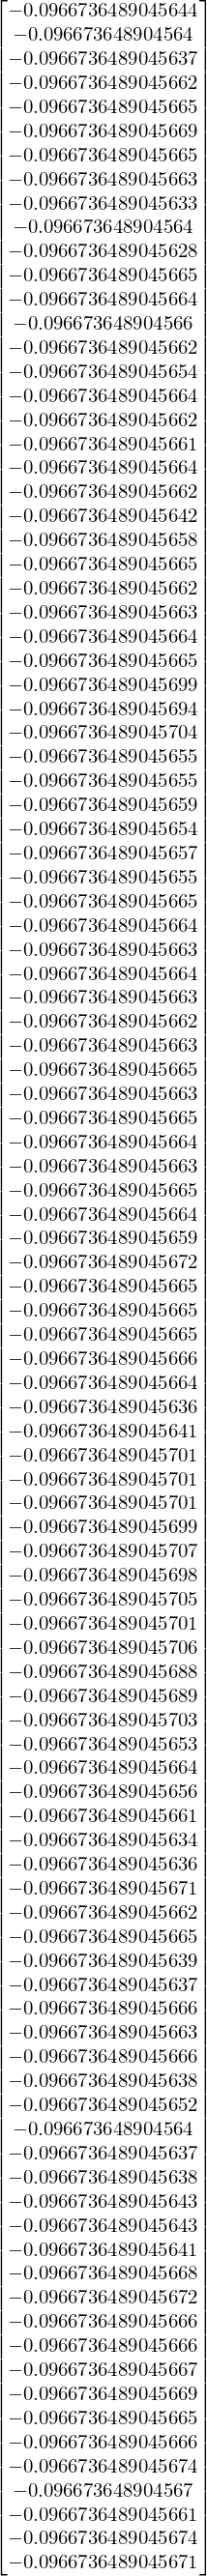

In [23]:
PrettyMatrix(Q[:,0])

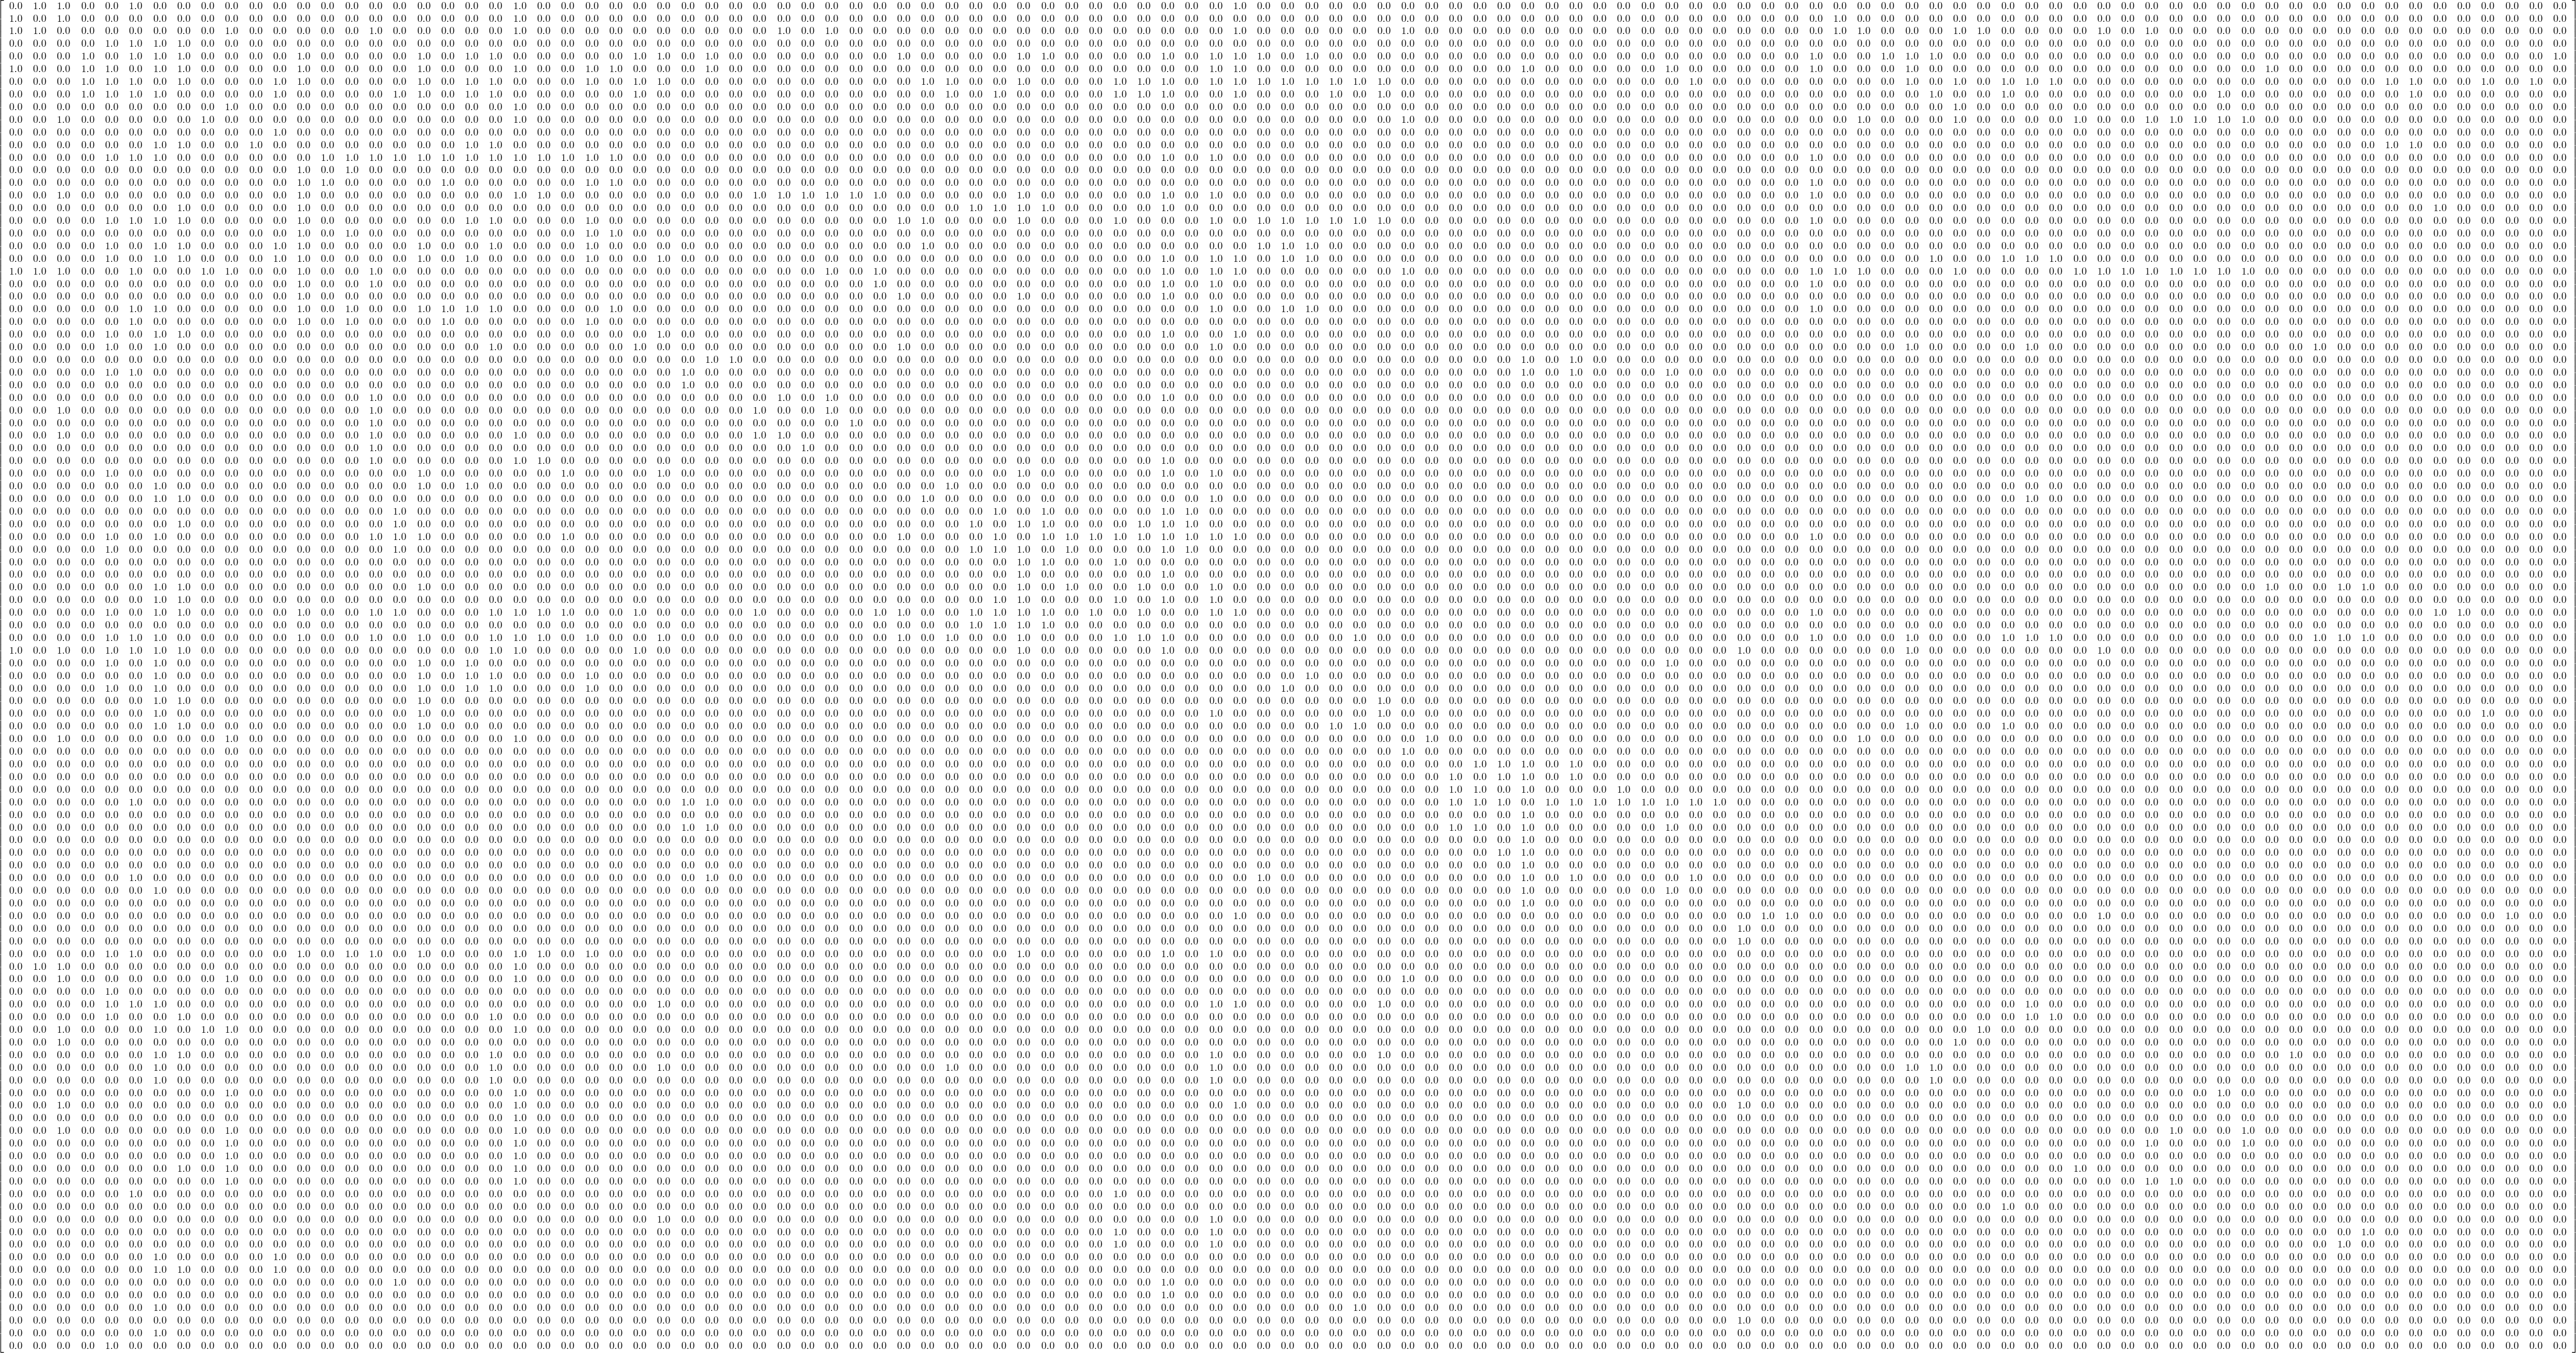

In [24]:
Au = A.copy()
Au[Au>1] = 1
PrettyMatrix(Au)

Text(0, 0.5, 'Eigenvalue')

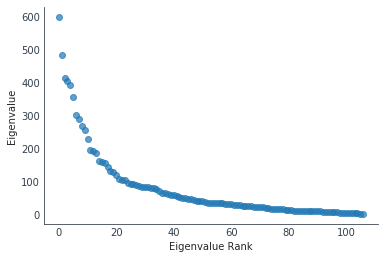

In [25]:
L = scigraph.laplacian(A)
d, Q = np.linalg.eigh(L)
plt.scatter(np.arange(len(d)), d[::-1], alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xlabel('Eigenvalue Rank')
plt.ylabel('Eigenvalue')

Text(0, 0.5, 'Eigenvalue')

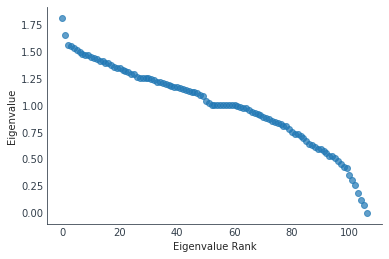

In [26]:
tau = 1
L_new = scigraph.laplacian(Au + np.ones_like(Au) * 0.01/len(Au), normed=True)
d, Q = np.linalg.eigh(L_new)
plt.scatter(np.arange(len(d)), d[::-1], alpha=0.7)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xlabel('Eigenvalue Rank')
plt.ylabel('Eigenvalue')

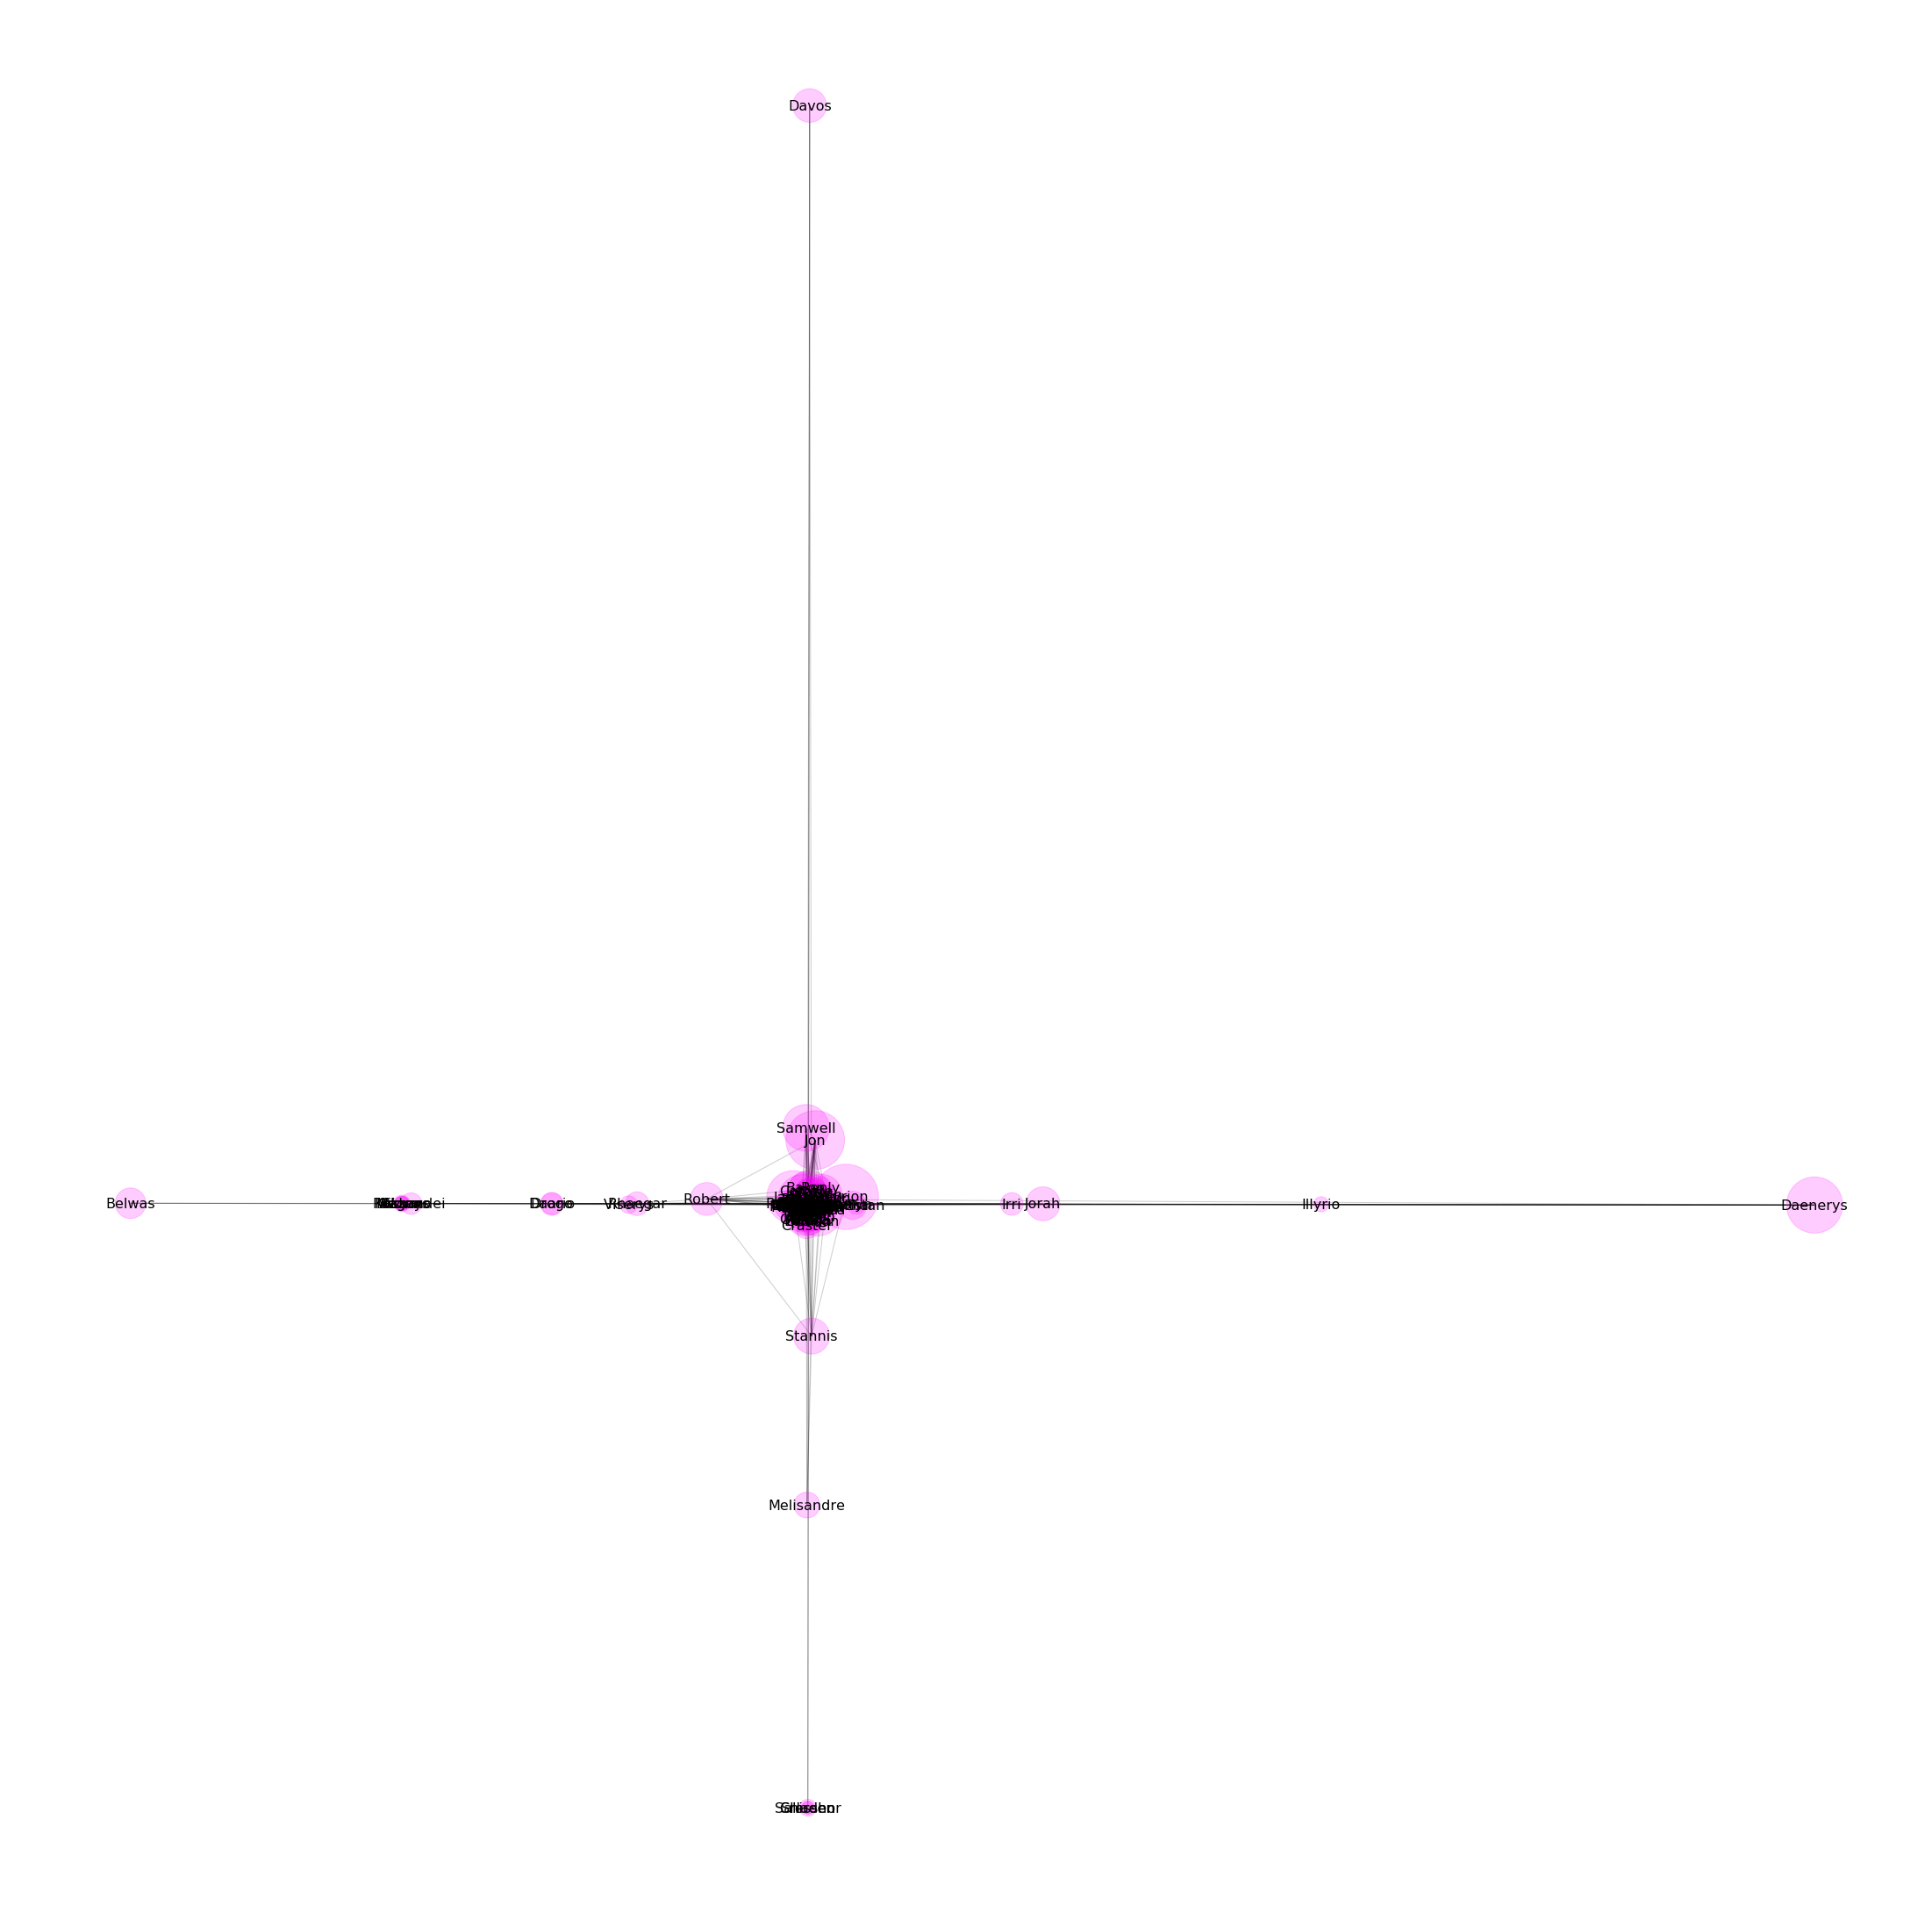

In [27]:
plt.figure(figsize=(30, 30),frameon=False)
pos = {}
for i, node in enumerate(G.node):
    pos[node] = Q[i][-2:]
size = nx.algorithms.pagerank(G)
nx.draw(G, pos, node_size=np.array(list(size.values())) * 100000,
        node_color='magenta', alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=16);

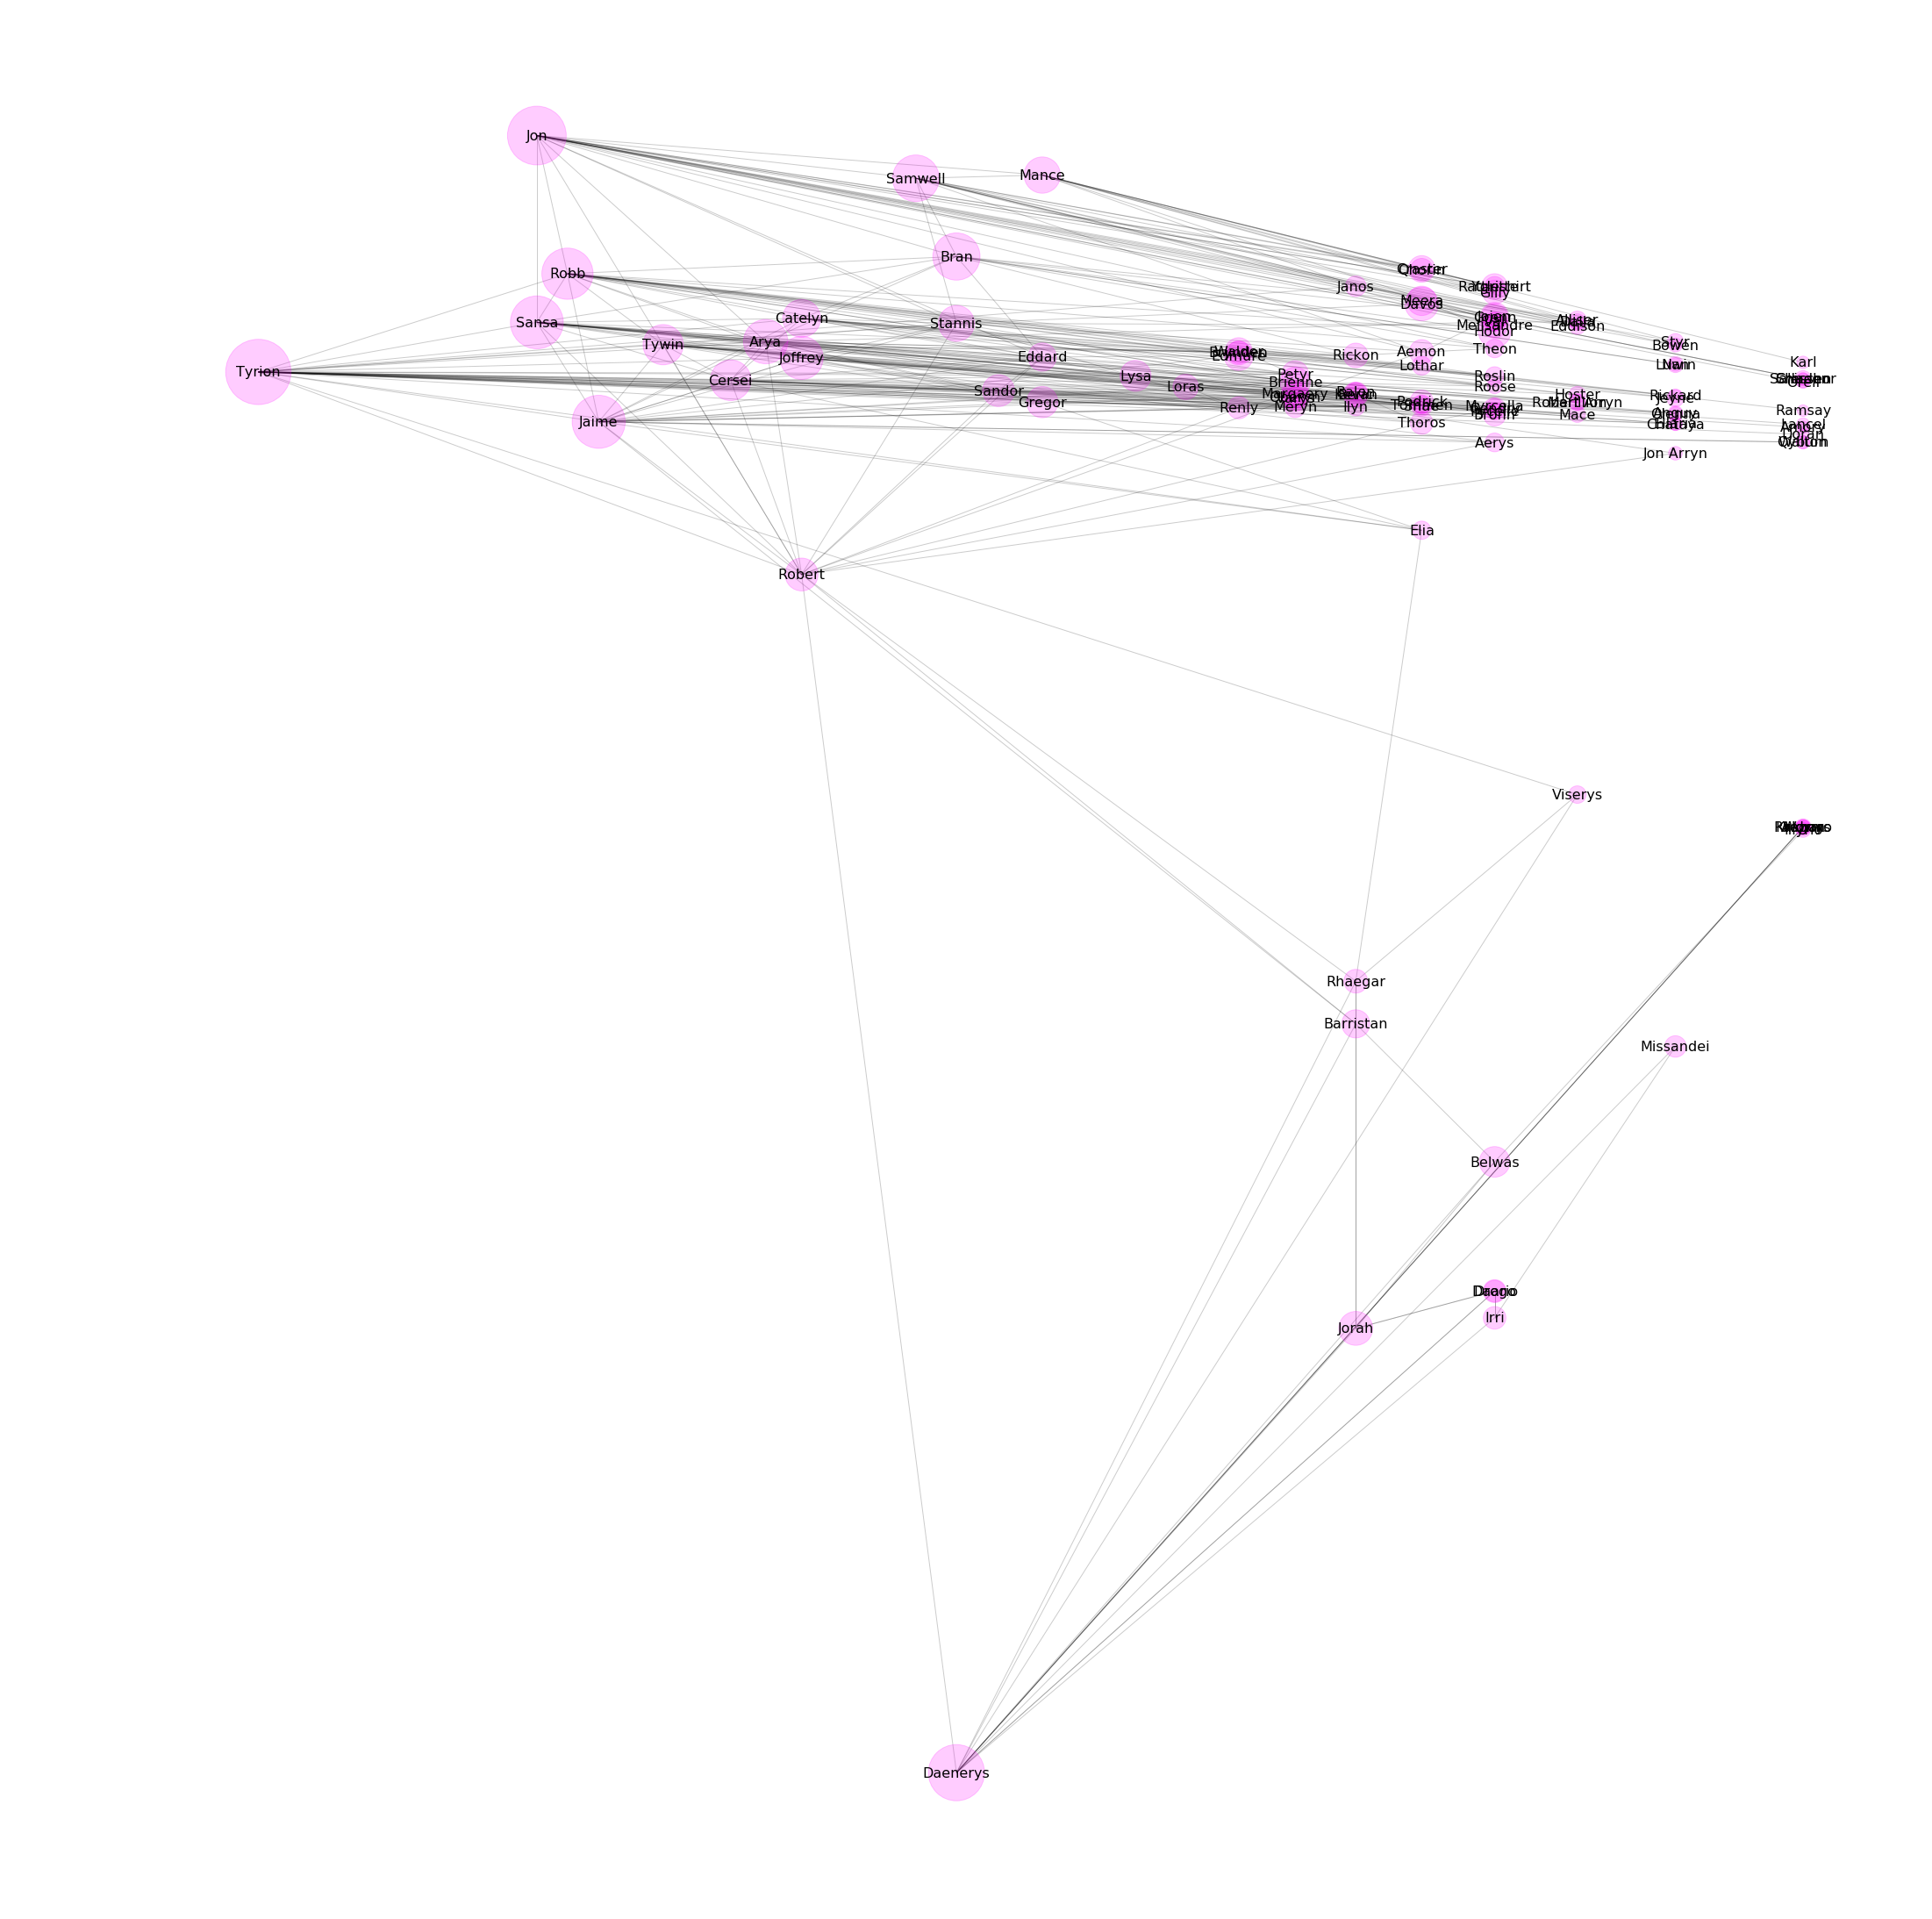

In [28]:
plt.figure(figsize=(30, 30),frameon=False)
pos = {}
for i, node in enumerate(G.node):
    pos[node] = Q[i][:2]
size = nx.algorithms.pagerank(G)
nx.draw(G, pos, node_size=np.array(list(size.values())) * 100000,
        node_color='magenta', alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=16);